In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [22]:
font_name_win="MS Gothic"
font_name_lin="Noto Sans CJK JP"
if os.name=="nt":
    font_name=font_name_win
else:
    font_name=font_name_li

In [23]:
xs=[ 
226,161, 55,225,237,  7,  9,  8,185,224,225, 88, 92,110, 62,218, 61, 33,138,145,145, 29,253,195,205,150, 53,145,106,183,239,104,247, 41,206,159, 20,147, 24,108, 43, 23,220,128,248,229,210,199, 92,  3,189, 90, 90,208, 22,150,  7,122, 32,133,172,199,144,177,
]
ys=[
 23, 48,103,141,137, 60, 27,192,182,163,161,196,141,134,  1,  8,152, 62, 12,123, 37,212,121,228, 10,123,136,164, 69,102, 25,235,117, 72, 16,131,214,186, 18, 91,123,250, 40, 68, 53,110, 12, 31,247,178,204,253,139,127,178, 40,183,189,163,186,206, 57,248,196,
]
path=[
 0,30,44,42,17, 5, 6,38,28, 9,10, 4,22,32,45,53,55, 1,25,35, 8,60,62,23,50, 3,15,46,34,24,47,61,29,19,13,54,36,21,31,37,59,57,11,16,26,40, 2,33,14,18,20,43,39,58,49,56, 7,41,51,48,12,52,27,63,
]

In [24]:
assert(len(xs)==64)
assert(len(ys)==64)
path_set=set(path)
assert(len(path_set)==64)

In [25]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

8246.336400860524


<Figure size 432x288 with 0 Axes>

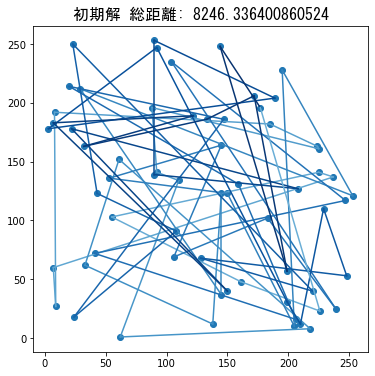

In [26]:
dist1=sum([distance(xs[i],ys[i],xs[i+1],ys[i+1]) for i in range(len(path)-1)])
print(dist1)
plt.clf()
plt.figure(figsize=(6,6))
plt.title(f"初期解 総距離: {dist1}",fontname=font_name, fontsize=16)
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))
plt.plot([xs[-1],xs[0]],[ys[-1],ys[0]],color=cm.Blues(0.5))
plt.show()

2747.59429954031


<Figure size 432x288 with 0 Axes>

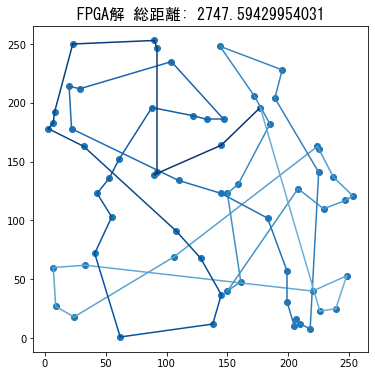

In [27]:
dist2=sum([distance(xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]) for i in range(len(path)-1)])
print(dist2)
plt.clf()
plt.figure(figsize=(6,6))
plt.title(f"FPGA解 総距離: {dist2}",fontname=font_name,fontsize=16)
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]],color=cm.Blues(i/len(path)/2+0.5))
plt.plot([xs[path[-1]],xs[path[0]]],[ys[path[-1]],ys[path[0]]],color=cm.Blues(0.5))
plt.show()

In [28]:
print(dist1-dist2)
print(hex(int(dist1-dist2)))

5498.742101320214
0x157a


In [29]:
for i in range(1,len(path)-1):
    for j in range(1,i-1):
        # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
        d1=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
        )
        # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
        d2=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
        )
        if d1>d2:
            print(f"{path[i]}{xs[path[i]],ys[path[i]]} <-> {path[j]}{xs[path[j]],ys[path[j]]}: {d1} -> {d2}")

In [30]:
def linerSearchSwap():
    for i in range(1,len(path)-1):
        for j in range(1,i):
            # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
            d1=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
            )
            # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
            d2=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
            )
            if d1>d2:
                path[i],path[j]=path[j],path[i]